<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.040981  23.773262  38.313210  ...  111.129530  111.127488  0.002042
      1.0    85.387274  93.899912  83.085703  ...  272.372368  272.372917 -0.000549
      2.0    51.853011  78.833821  82.875542  ...  223.562410  223.562345  0.000065
      3.0    37.557261  20.840006  81.333015  ...  149.730215  149.730419 -0.000204
      4.0    30.823039  94.501666  40.581951  ...  175.906552  175.906403  0.000149
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  68.652437  58.340276  41.345419  ...  178.338005  178.337879  0.000126
      116.0  43.676686  31.612638  33.409262  ...  118.700155  118.698375  0.001780
      117.0  46.695348  82.803603  45.439596  ...  184.938547  184.938630 -0.000083
      118.0  91.848078  67.536872  86.809311  ...  256.194168  256.194067  0.000102
      119.0  22.229705  96.610485  23.362402  ...  152.202815  152.202856 -0.000041

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.040981  23.773262  38.313210  ...  111.129530  111.127488  0.002042
      1.0    85.387274  93.899912  83.085703  ...  272.372368  272.372917 -0.000549
      2.0    51.853011  78.833821  82.875542  ...  223.562410  223.562345  0.000065
      3.0    37.557261  20.840006  81.333015  ...  149.730215  149.730419 -0.000204
      4.0    30.823039  94.501666  40.581951  ...  175.906552  175.906403  0.000149
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  68.652437  58.340276  41.345419  ...  178.338005  178.337879  0.000126
      116.0  43.676686  31.612638  33.409262  ...  118.700155  118.698375  0.001780
      117.0  46.695348  82.803603  45.439596  ...  184.938547  184.938630 -0.000083
      118.0  91.848078  67.536872  86.809311  ...  256.194168  256.194067  0.000102
      119.0  22.229705  96.610485  23.362402  ...  152.202815  152.202856 -0.000041

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.040981,23.773262,38.313210,2.076469e-03,111.129530,111.127488,0.002042
1,0.0,1.0,85.387274,93.899912,83.085703,-5.209594e-04,272.372368,272.372917,-0.000549
2,0.0,2.0,51.853011,78.833821,82.875542,3.628822e-05,223.562410,223.562345,0.000065
3,0.0,3.0,37.557261,20.840006,81.333015,-6.729237e-05,149.730215,149.730419,-0.000204
4,0.0,4.0,30.823039,94.501666,40.581951,-1.043055e-04,175.906552,175.906403,0.000149
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.652437,58.340276,41.345419,-1.265215e-04,178.338005,178.337879,0.000126
119996,999.0,116.0,43.676686,31.612638,33.409262,1.569235e-03,118.700155,118.698375,0.001780
119997,999.0,117.0,46.695348,82.803603,45.439596,-4.178533e-07,184.938547,184.938630,-0.000083
119998,999.0,118.0,91.848078,67.536872,86.809311,-9.327183e-05,256.194168,256.194067,0.000102


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.040981  23.773262  38.313210  ...  111.129530  111.127488  0.002042
      1.0    85.387274  93.899912  83.085703  ...  272.372368  272.372917 -0.000549
      2.0    51.853011  78.833821  82.875542  ...  223.562410  223.562345  0.000065
      3.0    37.557261  20.840006  81.333015  ...  149.730215  149.730419 -0.000204
      4.0    30.823039  94.501666  40.581951  ...  175.906552  175.906403  0.000149
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  68.652437  58.340276  41.345419  ...  178.338005  178.337879  0.000126
      116.0  43.676686  31.612638  33.409262  ...  118.700155  118.698375  0.001780
      117.0  46.695348  82.803603  45.439596  ...  184.938547  184.938630 -0.000083
      118.0  91.848078  67.536872  86.809311  ...  256.194168  256.194067  0.000102
      119.0  22.229705  96.610485  23.362402  ...  152.202815  152.202856 -0.000041

[120000 rows x 7 columns]

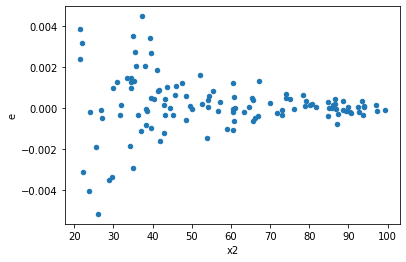

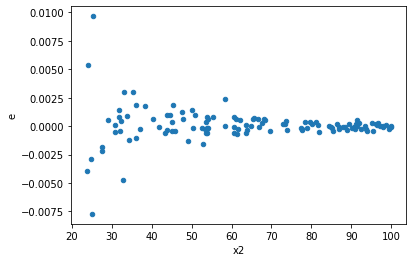

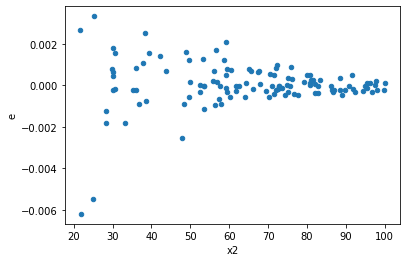

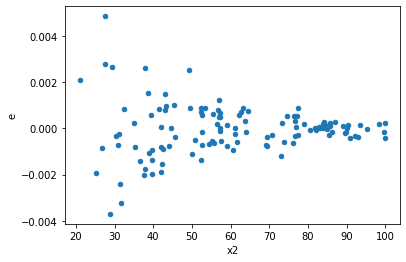

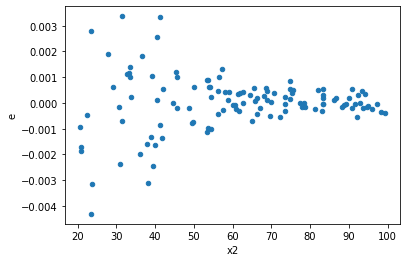

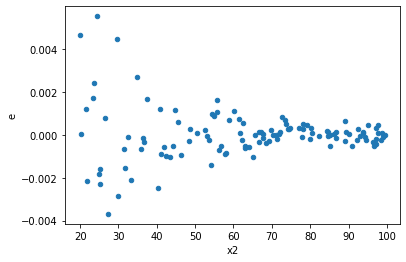

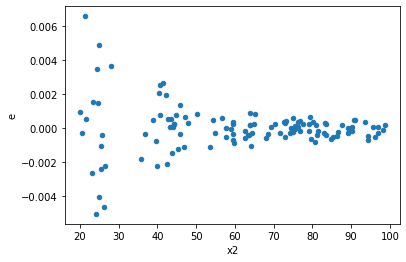

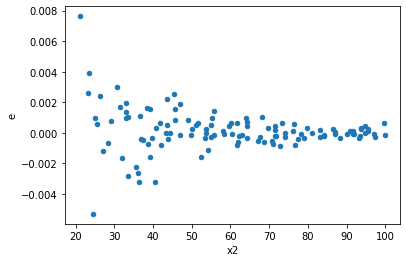

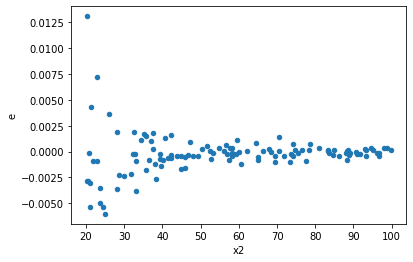

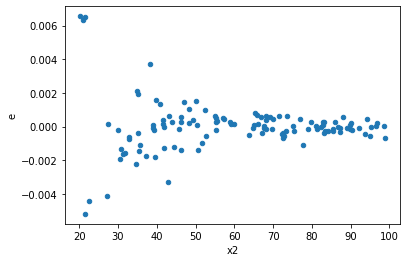

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0001862815650310326,6.694589551326655e-06,4.139590334022947e-06,1.487686566961479e-07,0.0359380143183326,2.8775891643035167e-21,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.00016592767201999682,6.179228882623159e-06,3.687281600444374e-06,1.3731619739162577e-07,0.037240496460882476,6.0733960217791945e-21,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0002616732766776729,5.797110906985551e-06,5.814961703948286e-06,1.2882468682190113e-07,0.02215400433926001,9.596322277387257e-26,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,9.069344324113724e-05,9.608866938378565e-06,2.0154098498030498e-06,2.1353037640841255e-07,0.10594886019301691,6.360031062613587e-12,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.00027967996806793605,5.071403961811314e-06,6.21511040150969e-06,1.126978658180292e-07,0.0181328823685343,1.2549700315109407e-27,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.0001094392327180974,6.996804294811768e-06,2.4319829492910533e-06,1.5548453988470594e-07,0.06393323601632618,3.8897709578280107e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0002186345322239656,4.957083083675858e-06,4.858545160532569e-06,1.1015740185946351e-07,0.022672919201061542,1.5807314866336733e-25,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.0002086723992288821,4.693873960666505e-06,4.637164427308491e-06,1.0430831023703344e-07,0.022493985682879098,1.3326202524681021e-25,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.00015462827024423988,6.683593489614496e-06,3.4361837832053305e-06,1.4852429976921104e-07,0.04322361932302266,1.3547248944406104e-19,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64